### DEEP LEARNING
Deep learning is a subset of machine learning that focuses on using neural networks inspired by the human brain with many layers (hence "deep") to model and understand complex patterns in data. It has been particularly successful in fields such as computer vision, natural language processing, and speech recognition.

##### What is Deep Learning?

Artificial Neural Networks
- Deep learning models are built using artificial neural networks (ANNs), which are computational models inspired by the structure and function of biological neural networks in the human brain. ANNs consist of layers of interconnected nodes (neurons) that process and transmit information.
- These networks can learn to recognize patterns and make decisions based on the data they are trained on.

Pattern discovery
- Deep learning algorithms excel at discovering intricate patterns in large datasets. They can automatically learn features from raw data, eliminating the need for manual feature engineering. This capability makes deep learning particularly effective for tasks such as image recognition, speech recognition, and natural language processing.

##### Important Characteristics

Layered structure 
- Neural networks are composed of an input layer, multiple hidden layers, and an output layer. Each layer processes the data and passes it to the next layer, allowing the network to learn hierarchical representations of the data.

Automated feature Extraction 
- Deep learning automatically learns representations of data, reducing the need for manual feature engineering. This is especially useful for complex data types like images and text.

##### What is neuron 
- A neuron, also known as a node or unit, is the fundamental building block of an artificial neural network. It is a computational unit that receives input, processes it, and produces an output. Neurons are inspired by biological neurons in the human brain, which transmit information through electrical and chemical signals.

- Input:  Data points or features that are fed into the neuron for processing.
- weight: Determine the importance of each input.
- Bias: Fine tunes the neuron's output.
- Activation function: Introduces non-linearity to the model, allowing it to learn complex patterns.

##### Layers in Neural Networks
- Input Layer: The first layer of the neural network that receives the raw input data and passes it to subsequent layers for processing.
- Hidden Layers: Intermediate layers between the input and output layers that perform computations and transformations on the data. These layers extract features and patterns from the input data.
- Output Layer: The final layer of the neural network that produces the network's prediction basedd on the processed data from the hidden layers.

##### Activation Functions
- Activation functions introduce non-linearity into the neural network, allowing it to learn complex patterns. Common activation functions include ReLU (Rectified Linear Unit), sigmoid, Hyperbolic Tangent (tanh), Leaky ReLU, and Softmax.
- Activation function plays a crucial role in determining the capacity and behavior of the neural network, affecting their convergence speed, stability, and overall performance on various tasks.

##### Optimization Algorithms
- Optimization algorithms are used to adjust the weights and biases of the neural network during training to minimize the loss function. Common optimization algorithms include Stochastic Gradient Descent (SGD), Adam, RMSprop, and Adagrad.

Deep Learning Frameworks 
- Popular deep learning frameworks include TensorFlow, PyTorch, Keras, and MXNet. These frameworks provide tools and libraries to build, train, and deploy deep learning models efficiently.

In [5]:
%pip install tensorflow keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

Note: you may need to restart the kernel to use updated packages.


In [6]:
data = pd.read_csv('predict_energy_consumption.xls')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [7]:
data.info()
data.isnull().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   wind_speed          1000 non-null   float64
 3   solar_irradiance    1000 non-null   float64
 4   energy_consumption  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [8]:
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']]
y = data['energy_consumption'].values

In [13]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(800, 4)

In [16]:
X_test.shape

(200, 4)

In [ ]:

model= Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # output layer for regression (1 neuron)
])


c:\Users\Asys\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  
# Mean Squared Error and Mean Absolute Error


In [20]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 90304.3203 - mae: 271.6055 - val_loss: 83613.4531 - val_mae: 258.8535
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 89781.9844 - mae: 270.6548 - val_loss: 82984.0312 - val_mae: 257.6357
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 88939.2891 - mae: 269.0882 - val_loss: 81925.2109 - val_mae: 255.5782
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 87535.2578 - mae: 266.4601 - val_loss: 80209.2734 - val_mae: 252.1982
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 85340.6406 - mae: 262.3140 - val_loss: 77638.5625 - val_mae: 247.0457
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 82180.8906 - mae: 256.1906 - val_loss: 74057.1875 - val_mae: 239.6750
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 77920.7656 - mae: 247.6009 - val_loss: 69337.7422 - val_mae: 229.5868
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 72362.8281 - mae: 236.2119 - val_loss: 63547

In [21]:

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17982.4434 - mae: 115.5095  
Test Mean Absolute Error: 115.51


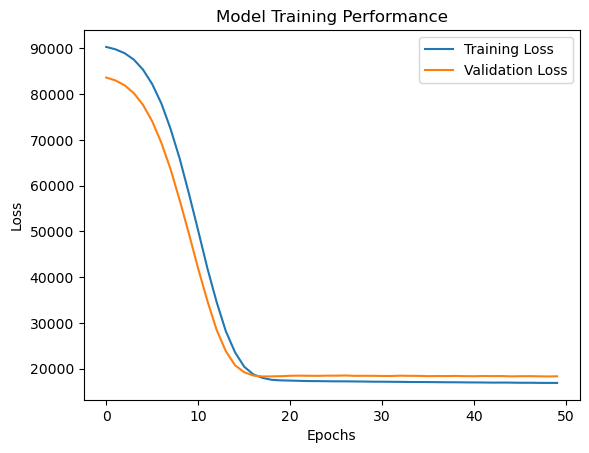

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[285.68848],
       [258.46356],
       [250.62163],
       [209.33101],
       [333.0605 ],
       [310.9052 ],
       [314.07983],
       [299.09808],
       [286.95343],
       [271.11728],
       [242.07338],
       [260.90994],
       [273.79538],
       [238.1999 ],
       [297.20984],
       [303.97516],
       [265.26538],
       [314.33795],
       [284.84976],
       [241.42104],
       [272.88184],
       [278.9198 ],
       [275.98083],
       [275.19403],
       [251.43512],
       [240.5224 ],
       [261.36243],
       [311.82712],
       [296.52524],
       [274.29483],
       [233.60794],
       [314.05176],
       [290.51453],
       [276.84564],
       [309.75775],
       [296.41812],
       [218.9376 ],
       [261.09885],
       [281.20416],
       [240.01796],
       [244.7284 ],
       [249.5743 ],
       [252.13387],
       [266.0753 ],
       [265.8804 ],
       [260.1433 ],
       [257.3365 ],
       [259.03613],
       [287.4426 ],
       [295.35727],


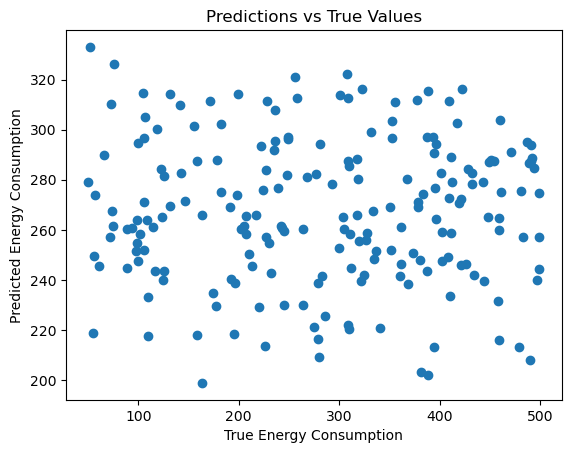

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()